In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torch import jit
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


## 1. Setting up the dataset

### 1.1 Downloadinng the dataset

In [5]:
train_dataset = MNIST(".", train=True, download=True, transform=transforms.ToTensor())
test_dataset = MNIST(".", train=False, download=True, transform=transforms.ToTensor())

### 1.2 explroe the dataset

In [6]:
f"size of train dataset: {len(train_dataset)}, size of test dataset: {len(test_dataset)}"

'size of train dataset: 60000, size of test dataset: 10000'

In [7]:
print(train_dataset[0][0].shape) # channel, height, width
print(train_dataset[0][0])

torch.Size([1, 28, 28])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

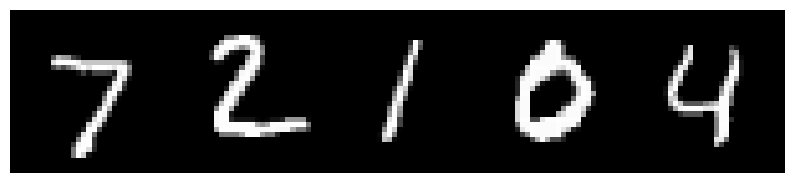

In [8]:
test_imgs = torch.stack([test_dataset[i][0] for i in range(5)])

grid = torchvision.utils.make_grid(test_imgs, nrow=5)
            
plt.figure(figsize=(10, 10))
plt.imshow(grid.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.axis('off')
plt.show()

### 1.3 Prepare the data

In [9]:
# can we do better than just randomly splitting the dataset?
validation_data, train_data = random_split(train_dataset, [10000, 50000])

In [10]:
BATCH_SIZE = 64

In [11]:
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE)
val_dataloader = DataLoader(validation_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

## 2. Building the model

### 2.1 Components of the model

- Layers
  - Linear
  - Conv2D
  - MaxPooling2D
  - Flatten
  - Dropout
- Activation function
  - ReLU
  - Sigmoid
  - tanh
  - softmax
- Loss function
  - Binary Crossentropy
  - Mean Squared Error
- Optimizer
  - SGD
  - Adam
  - RMSprop

### 2.2 Layers

Here are some examples of layers that can be used in a ML model.

1. Linaer

In [12]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = nn.Linear(10, 5)(x)
print("after:")
print(x)

before:
tensor([[-0.5205, -0.7358,  0.2515,  0.1211, -0.7397, -0.4812, -0.2663, -0.1858,
         -0.5733, -0.4178]])
after:
tensor([[-0.0461, -0.3019,  0.4110, -0.3068, -0.0165]],
       grad_fn=<AddmmBackward0>)


2. Flatten

In [13]:
x = torch.arange(6).reshape(2, 3)
print("before:")
print(x)
x = torch.flatten(x)
print("after:")
print(x)

before:
tensor([[0, 1, 2],
        [3, 4, 5]])
after:
tensor([0, 1, 2, 3, 4, 5])


### 2.3 Activation functions

1. ReLU (Rectified Linear Unit)  
observe that any negative input will be replaced by 0.

![ReLU](assets/relu.png)

In [14]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = F.relu(x)
print("after:")
print(x)

before:
tensor([[-0.4273,  0.0432, -1.8495,  1.1157,  0.2291, -1.1126, -0.4063, -0.2019,
         -1.0979,  0.2847]])
after:
tensor([[0.0000, 0.0432, 0.0000, 1.1157, 0.2291, 0.0000, 0.0000, 0.0000, 0.0000,
         0.2847]])


2. Sigmoid

![Sigmoid](assets/sigmoid.png)

In [15]:
x = torch.randn(1, 10)
print("before:")
print(x)
x = nn.Sigmoid()(x)
print("after:")
print(x)

before:
tensor([[ 0.8132,  2.0232,  0.5164, -0.9744, -0.3911, -0.3644, -0.4578,  0.8458,
         -0.7360,  1.1482]])
after:
tensor([[0.6928, 0.8832, 0.6263, 0.2740, 0.4035, 0.4099, 0.3875, 0.6997, 0.3239,
         0.7592]])


3. Other activation functions

![Other activation functions](assets/activations.png)

### 2.4 Define the model

You can play around with the forward pass of the model by changing the layers and activation functions!

Some ideas:
- Add more layers (does deeper model means better performance?)
- Change the activation functions (does it change the behavior of the model?)
- Change the number of neurons in the layers

In [16]:
class SimpleMLP(nn.Module):
    def __init__(self, hidden):
        super().__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, hidden),
            nn.ReLU(),
            nn.Linear(hidden, 10),
        )
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.model(x)
        return x

### 2.5 Optimizers

![optimizers gif](assets/optimizers.gif)  
  
_Source: https://github.com/j-w-yun/optimizer-visualization_

### 2.6 Loss functions

1. MSE Loss  
The more you deviate from true value, the more you get punished  
Good for regression task where outputs are continuous values  
$\huge L=\frac{1}{n}\sum\limits_{i=1}^{n}(y_i- \hat{y_i})^2$  
  

2. Binary Cross Entropy Loss  
Here, $p_i$ represents the probability of prediction for $i$ th class, and  $y_i$ is 1 if $y_i$ is the true label, and 0 otherrwise.  
Requires Softmax to calculate $p_i$ from $\hat{y_i}$ but Pytorch takes care of all those.  
$\huge L=-\frac{1}{n}\sum\limits_{i=1}^{n}(y_ilog(p_i)+(1-y_i)log(1-p_i))$

**If we use different loss functions, we get different loss values. Can we directly compare the loss values among different loss functions?**

## 3. Training the model

### 3.1 Define the training loop

In [17]:
def train_one_epoch(model, dataloader, loss_fn, optimizer):
    
    running_losses = 0 # store the loss value for plotting
    
    model.train() # what is this line doing?
    
    for (X, y) in dataloader:
        
        # move data to GPU if available
        # This might perform worse because of the overhead of moving data to GPU
        X = X.to(device)
        y = y.to(device)

        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        
        optimizer.zero_grad() # why do we need to set the gradients to zero?
        loss.backward()
        optimizer.step()
        
        running_losses += loss
    
    return running_losses / len(dataloader)

### 3.2 Initialize the model

<div class="alert">
  <strong>Warning!</strong> <br>After changing training parameters like eopchs and learning rate, or after changing functions involving model object, be sure to initialize the model again before starting the training process again.
</div>

In [18]:
EPOCHS = 10
LR = 0.005

In [19]:
model = SimpleMLP(64)# initialize model
model.to(device) # move model to GPU if available

SimpleMLP(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

### 3.3 Define loss function and optimizer

Just like the model, you can play around with the loss function and optimizer!

ideas:
- Change the loss function (e.g. MSE, Categorical Crossentropy)
- Change the optimizer (e.g. SGD, RMSprop)
- Change the number of Epochs (What happens if we train the model too much?)
- Change the learning rate (how does it affect the training?)

In [20]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LR)

# here are some other optimizers you can try
#optimizer = torch.optim.RMSprop(model.parameters(), lr=LR)
#optimizer = torch.optim.Adam(model.parameters(), lr=LR)

### 3.4 Train the model

In [21]:
EPOCHS = 10

train_loss_list = []
val_loss_list = []
accuracy_list = []

for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_dataloader, loss_fn, optimizer)
    
    model.eval()
    
    total_correct = 0
    with torch.no_grad(): # disable gradient calculation since we are not training
        for (X, y) in val_dataloader:
            
            X = X.to(device)
            y = y.to(device)
            
            y_hat = model(X)
            validation_loss = loss_fn(y_hat, y)

            # calculate accuracy
            total_correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()

    accuracy = total_correct / len(validation_data)
    print(f"Epoch {epoch+1}, train loss: {train_loss}, validation loss: {validation_loss}, validation accuracy: {accuracy * 100:.2f}%")
    
    train_loss_list.append(train_loss)
    val_loss_list.append(validation_loss)
    accuracy_list.append(accuracy)

            

Epoch 1, train loss: 1.7940689325332642, validation loss: 1.3428254127502441, validation accuracy: 78.72%
Epoch 2, train loss: 0.8917871713638306, validation loss: 0.880965530872345, validation accuracy: 84.50%
Epoch 3, train loss: 0.6025619506835938, validation loss: 0.7391858100891113, validation accuracy: 86.45%
Epoch 4, train loss: 0.49719348549842834, validation loss: 0.678839385509491, validation accuracy: 87.62%
Epoch 5, train loss: 0.4427662789821625, validation loss: 0.6462671756744385, validation accuracy: 88.49%
Epoch 6, train loss: 0.40921109914779663, validation loss: 0.6246924996376038, validation accuracy: 89.03%
Epoch 7, train loss: 0.3861687183380127, validation loss: 0.6087179780006409, validation accuracy: 89.34%
Epoch 8, train loss: 0.36911705136299133, validation loss: 0.5964250564575195, validation accuracy: 89.60%
Epoch 9, train loss: 0.3557773530483246, validation loss: 0.5858348608016968, validation accuracy: 89.97%
Epoch 10, train loss: 0.3449022173881531, val

### 3.5 Test the model

In [34]:
total_correct = 0
total_loss = 0

model = model.to(device)

for idx, (X, y) in enumerate(test_dataloader):
    
    X = X.to(device)
    y = y.to(device)
    
    y_hat = model(X)
    total_loss += loss_fn(y_hat, y)

    # calculate accuracy
    total_correct += (y_hat.argmax(1) == y).type(torch.float).sum().item()

print(f"Test loss: {total_loss/(idx+1)}, test accuracy: {total_correct/len(test_dataset) * 100:.2f}%")

Test loss: 0.32416412234306335, test accuracy: 90.97%


## 4. Analyzing the results

### 4.1 Visualize the training loss and validation loss

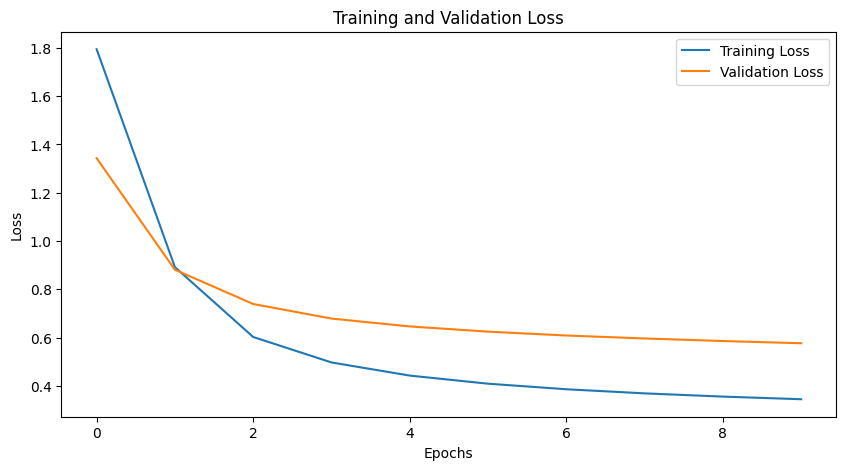

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), [loss.item() for loss in train_loss_list], label='Training Loss')
plt.plot(range(EPOCHS), [loss.item() for loss in val_loss_list], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

### 4.2 Visualize the validation accuracy

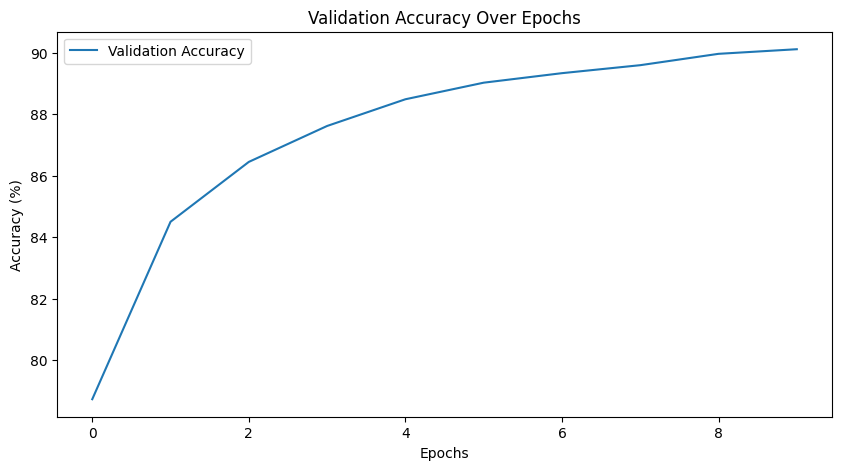

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(EPOCHS), [acc * 100 for acc in accuracy_list], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.legend()
plt.show()

### 4.3 Check misclassified images

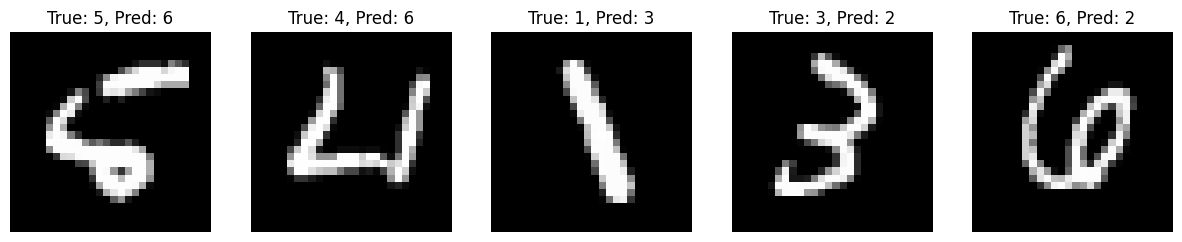

In [25]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()

with torch.no_grad():
    for X, y in test_dataloader:
        X = X.to(device)
        y = y.to(device)
        
        y_hat = model(X)
        preds = y_hat.argmax(1)
        
        misclassified_indices = (preds != y).nonzero(as_tuple=True)[0]
        
        for idx in misclassified_indices:
            misclassified_images.append(X[idx].cpu())
            misclassified_labels.append(y[idx].cpu().item())
            misclassified_preds.append(preds[idx].cpu().item())

# Plot some misclassified images
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 15))

for i in range(num_images_to_plot):
    axes[i].imshow(misclassified_images[i].squeeze(), cmap='gray')
    axes[i].set_title(f"True: {misclassified_labels[i]}, Pred: {misclassified_preds[i]}")
    axes[i].axis('off')

plt.show()

### 4.4 Save the model

In [26]:
torch.save(model.state_dict(), "model/mnist_model.pth")

### exporting jitted model

In [30]:
model = model.to("cpu")
model.eval()

x = torch.ones(1, 1, 28, 28)
model_trace = jit.trace(model, x)
jit.save(model_trace, "model/mnist_model_jitted.pt")